In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [36]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator (
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [37]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of y_test: (400, 1)


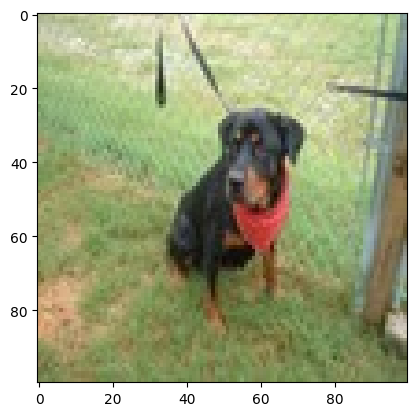

In [38]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [39]:
model = Sequential([
    Conv2D(32, (3,3), activation= 'relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation= 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [40]:
model = Sequential()

model.add(Conv2D(32, (3,3),activation= 'relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [42]:
model.fit(datagen.flow(X_train, Y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, Y_test),
          verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5025 - loss: 0.7124 - val_accuracy: 0.6000 - val_loss: 0.6925
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5155 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5460 - loss: 0.6879 - val_accuracy: 0.5850 - val_loss: 0.6850
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5850 - loss: 0.6774 - val_accuracy: 0.5050 - val_loss: 0.7299
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5925 - loss: 0.6764 - val_accuracy: 0.5975 - val_loss: 0.6684
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5880 - loss: 0.6680 - val_accuracy: 0.6075 - val_loss: 0.6639
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6005 - loss: 0.6608 - val_accuracy: 0.6350 - val_loss: 0.6544
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6045 - loss: 0.6675 - val_accuracy: 0.6225 - v

In [43]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7400 - loss: 0.5263


[0.526294469833374, 0.7400000095367432]

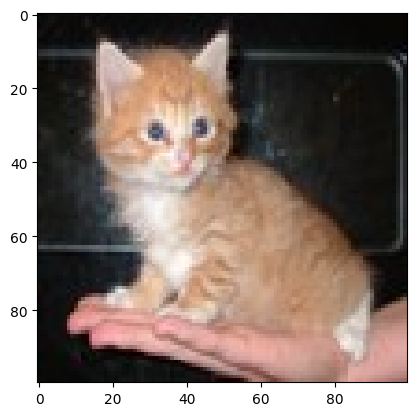

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Our model says it is a : cat


In [44]:
idx2=random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred>0.5

if(y_pred==0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [45]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5
